In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from utils import *
from datetime import datetime

In [2]:
import math
def log(x):
    if x <= 0:
        return -math.log(-(x - 1))
    else: 
        return math.log(x + 1)

In [3]:
train, test = load_data(resave=True, points=False)

/home/sokolov_yas/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['time', 'id', 'code']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [ ]:
train, test = add_features(train, test)

In [4]:
train.head()

,time,date,v_l,q,n_tr,sum_b,code_azs,id,first_prch,location,region,code,code1,percent,type
0,NaN,2016-12-28,30.46,0,2016,1090.60,5915.0,21-8B2-7695,2016-12-27 23:06:11,10.0,454.5,1010121,126.0,0.0,5
1,NaN,2016-12-27,0.00,1,2016,180.91,5915.0,21-8B2-7695,2016-12-27 23:06:11,10.0,454.5,2230000,164.0,0.0,6
2,NaN,2016-12-27,35.60,0,2016,1363.48,5915.0,21-8B2-7695,2016-12-27 23:06:11,10.0,454.5,1010131,128.0,0.0,13
3,08:24:24,2017-10-23,31.01,0,2017,1181.45,5915.0,21-8B2-7695,2016-12-27 23:06:11,10.0,454.5,1010121,126.0,0.0,7
4,NaN,2017-03-19,51.95,0,2017,1818.09,2418.0,21-8B2-7695,2016-12-27 23:06:11,9.0,454.0,1010121,126.0,0.0,5


In [9]:
time = pd.to_datetime(train.time)

## Missing values

In [10]:
for column in train.columns:
    print('{} has {} missing values'.format(column, train[column].isnull().sum()))

time has 1563471 missing values
date has 0 missing values
v_l has 0 missing values
q has 0 missing values
n_tr has 0 missing values
sum_b has 76 missing values
code_azs has 3414 missing values
id has 0 missing values
location has 689 missing values
region has 2270 missing values
code has 0 missing values
code1 has 29277 missing values
percent has 278 missing values
type has 0 missing values
return_num has 0 missing values
first_prch has 0 missing values
oil_price has 0 missing values


### sum_b

сумма покупки

In [22]:
train.sum_b.isnull().sum()

76

Пропущенных мало, не страшно.

In [10]:
train.sum_b.describe()

count    5.563526e+06
mean     6.981997e+02
std      6.822706e+02
min     -5.986480e+03
25%      2.272500e+02
50%      5.452400e+02
75%      9.092300e+02
max      3.541745e+04
Name: sum_b, dtype: float64

Есть отрицательные. Все распределения подходят под гипотезу о том, что это возвраты товаров.

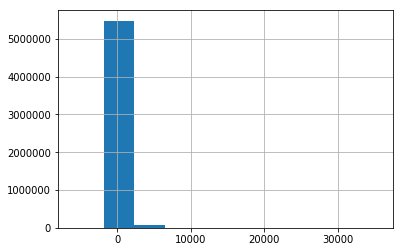

In [15]:
train.sum_b.hist();

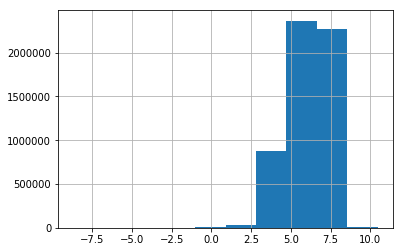

In [20]:
train.sum_b.apply(log).hist();

### q

количество приобретенного товара в магазине при АЗС

In [23]:
train.q.isnull().sum()

0

In [24]:
train.q.describe()

count    5.563602e+06
mean     2.514134e-01
std      1.338657e+00
min     -2.450000e+02
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.000000e+02
Name: q, dtype: float64

Та же теория про возвраты.

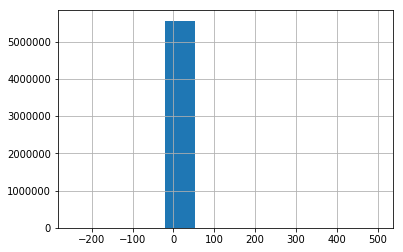

In [25]:
train.q.hist();

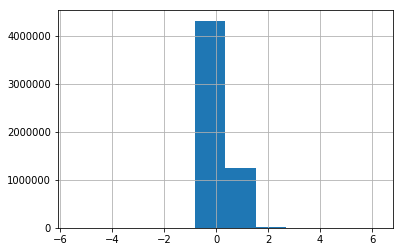

In [26]:
train.q.apply(log).hist();

### v_l

объем приобретенного нефтепродукта

In [27]:
train.v_l.isnull().sum()

0

In [28]:
train.v_l.describe()

count    5.563602e+06
mean     1.855327e+01
std      1.913043e+01
min     -1.601100e+02
25%      5.380000e+00
50%      1.455000e+01
75%      2.681000e+01
max      9.679500e+02
Name: v_l, dtype: float64

Опять возвраты

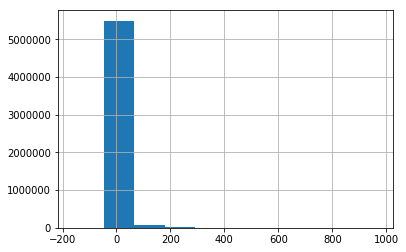

In [29]:
train.v_l.hist();

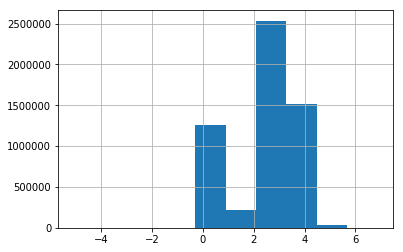

In [30]:
train.v_l.apply(log).hist();

In [24]:
azs_sum = df.groupby(by='code_azs').sum_b.sum()

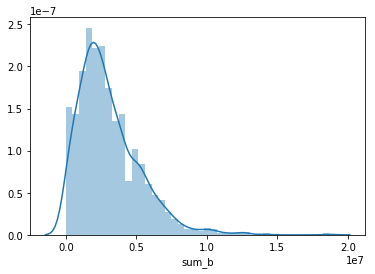

In [21]:
sns.distplot(azs_sum);

In [25]:
user_sum = df.groupby(by='id').sum_b.sum()

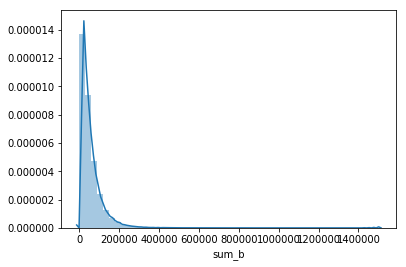

In [27]:
sns.distplot(user_sum);

## Time

In [10]:
train.time.isnull().sum()

1563471

In [11]:
train.time.describe()

count      4000131
unique       86397
top       18:21:41
freq           103
Name: time, dtype: object

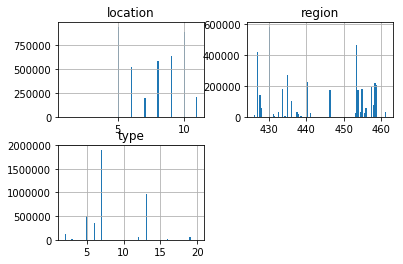

In [24]:
train[~train.time.isnull()][['location','type','region']].hist(bins=100);

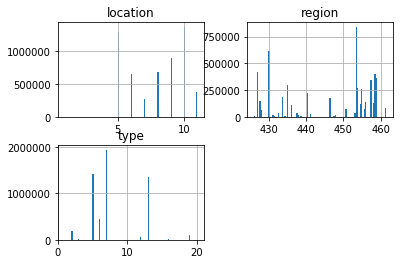

In [23]:
train[['location','type','region']].hist(bins=100);

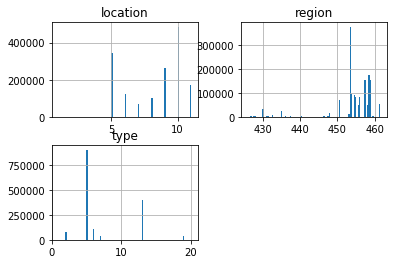

In [25]:
train[train.time.isnull()][['location','type','region']].hist(bins=100);

In [30]:
train['time_is_null'] = train.time.isnull()

In [32]:
loc = train.groupby('location').time_is_null.sum()

In [43]:
sns.(loc.sort_values(ascending=False).values)

AttributeError: module 'seaborn' has no attribute 'plot'

In [39]:
loc.sort_values(ascending=False)

location
10.0    484452.0
5.0     345844.0
9.0     263721.0
11.0    169650.0
6.0     125632.0
8.0      99982.0
7.0      71575.0
3.0        728.0
1.0        580.0
2.0        557.0
4.0        402.0
Name: time_is_null, dtype: float64